# Running Hugging Face Models on the DeepSparse Inference Runtime


[DeepSparse](https://neuralmagic.com/deepsparse/) is a sparsity-aware inference runtime that delivers GPU-class performance on commodity CPUs, purely in software, anywhere.

You can use the DeepSparse to run inference using models from Hugging Face. DeepSparse is built to offer GPU-class performance on commodity CPUs by taking advantage of the fast and large caches of CPUs. DeepSparse achieves its performance using breakthrough algorithms that reduce the computation needed for neural network execution and accelerating the resulting memory-bound computation.

In [ ]:
pip install git+https://github.com/neuralmagic/optimum-deepsparse.git

## Feature Extraction

Feature extraction involves using a model to build feaures for use in another step in natural langugage processing or computer vision. For example, you can use a pre-trained model to extract features from a dataset and use them for transfer learning learning. By doing so, you save  time and resources because you are not training the model from scratch (that is, the weights and biases are not being intialized from random numbers).

In [ ]:
from transformers.onnx.utils import get_preprocessor
from optimum.deepsparse import DeepSparseModelForFeatureExtraction
from transformers import pipeline

model_id = "bert-base-cased"
onnx_model = DeepSparseModelForFeatureExtraction.from_pretrained(model_id, export=True)
tokenizer = get_preprocessor(model_id)
pipe = pipeline("feature-extraction", model=onnx_model, tokenizer=tokenizer)
text = "My Name is Philipp and i live in Germany."
outputs = pipe(text)
outputs

Framework not specified. Using pt to export to ONNX.


Using framework PyTorch: 2.0.1+cu118
Overriding 1 configuration item(s)
	- use_cache -> False


============= Diagnostic Run torch.onnx.export version 2.0.1+cu118 =============
verbose: False, log level: Level.ERROR
======================= 0 NONE 0 NOTE 0 WARNING 0 ERROR ========================



Model is dynamic and has no shapes defined, skipping reshape..


[[[0.5142256021499634,
   -0.06450551003217697,
   -0.026636233553290367,
   -0.20092371106147766,
   -0.10576440393924713,
   -0.29067671298980713,
   0.08587245643138885,
   -0.24994951486587524,
   -0.061712559312582016,
   -1.2265048027038574,
   -0.4554709494113922,
   0.09363473951816559,
   -0.2929202616214752,
   -0.041816454380750656,
   -0.5019758939743042,
   -0.028016438707709312,
   0.026809891685843468,
   0.22922444343566895,
   -0.11135012656450272,
   -0.18364566564559937,
   0.35135069489479065,
   -0.08092530816793442,
   0.5044523477554321,
   0.021176151931285858,
   0.571942150592804,
   -0.0012142673367634416,
   0.4298468232154846,
   0.1704430878162384,
   -0.14455321431159973,
   0.09809715300798416,
   -0.30957314372062683,
   0.08616982400417328,
   -0.5528544187545776,
   -0.1377211958169937,
   -0.11551351845264435,
   0.16248340904712677,
   0.04400460049510002,
   -0.49486783146858215,
   -0.03765053674578667,
   -0.09085416048765182,
   -0.2510783076286

## Token Classification

Token Classification is the task of extracting and locating named entities in a sentence. The entities include, people's names, location, organizations, etc.



You can use token classification to process text before storing the information in a database. For example, you may want to process text and store the entities in different columns depending on the entity type.

[Want to train a sparse model on your data? Checkout the documentation on sparse transfer learning](https://docs.neuralmagic.com/use-cases/natural-language-processing/question-answering)

In [ ]:
from transformers import AutoTokenizer, pipeline
from optimum.deepsparse import DeepSparseModelForTokenClassification

model_id = "hf-internal-testing/tiny-random-RobertaModel"
seq_length = 128
input_shapes = f"[1,{seq_length}]"
model = DeepSparseModelForTokenClassification.from_pretrained(
    model_id,
    export=True,
)
tokenizer = AutoTokenizer.from_pretrained(model_id)
pipe = pipeline(
    "token-classification",
    model=model,
    tokenizer=tokenizer,
)

outputs = pipe("Norway is beautiful and has great hotels")
print(outputs)

Framework not specified. Using pt to export to ONNX.
Some weights of RobertaForTokenClassification were not initialized from the model checkpoint at hf-internal-testing/tiny-random-RobertaModel and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Using framework PyTorch: 2.0.1+cu118
Overriding 1 configuration item(s)
	- use_cache -> False


============= Diagnostic Run torch.onnx.export version 2.0.1+cu118 =============
verbose: False, log level: Level.ERROR
======================= 0 NONE 0 NOTE 0 WARNING 0 ERROR ========================



Model is dynamic and has no shapes defined, skipping reshape..


[{'entity': 'LABEL_0', 'score': 0.5486582, 'index': 1, 'word': 'N', 'start': 0, 'end': 1}, {'entity': 'LABEL_0', 'score': 0.5320723, 'index': 2, 'word': 'or', 'start': 1, 'end': 3}, {'entity': 'LABEL_0', 'score': 0.5137728, 'index': 3, 'word': 'way', 'start': 3, 'end': 6}, {'entity': 'LABEL_1', 'score': 0.5307435, 'index': 4, 'word': 'Ġis', 'start': 7, 'end': 9}, {'entity': 'LABEL_0', 'score': 0.55689734, 'index': 5, 'word': 'Ġbe', 'start': 10, 'end': 12}, {'entity': 'LABEL_0', 'score': 0.5694903, 'index': 6, 'word': 'a', 'start': 12, 'end': 13}, {'entity': 'LABEL_0', 'score': 0.5257641, 'index': 7, 'word': 'ut', 'start': 13, 'end': 15}, {'entity': 'LABEL_1', 'score': 0.5095042, 'index': 8, 'word': 'if', 'start': 15, 'end': 17}, {'entity': 'LABEL_1', 'score': 0.51480544, 'index': 9, 'word': 'ul', 'start': 17, 'end': 19}, {'entity': 'LABEL_1', 'score': 0.54430664, 'index': 10, 'word': 'Ġand', 'start': 20, 'end': 23}, {'entity': 'LABEL_0', 'score': 0.5196867, 'index': 11, 'word': 'Ġhas',

## Semantic Segmentation

Image segmentation also referred to as semantic segmentation, is the task of assigning a label to each pixel in an image. In semantic segmentation, the label map represents the predicted category for each pixel.

An example use case for image segmentation is in the sorting and packing of fruits. Accurate detection and segmentation can help to improve quality and lower inspection costs.

The video below shows an example of real-time image segmantation performed using DeepSparse.


![Segmentation Example](https://huggingface.co/spaces/neuralmagic/cv-yolact/resolve/main/oranges.gif)

[Want to train a sparse model on your data? Checkout the documentation on sparse transfer learning](https://docs.neuralmagic.com/use-cases/object-detection/sparsifying)

Framework not specified. Using pt to export to ONNX.


Could not find image processor class in the image processor config or the model config. Loading based on pattern matching with the model's feature extractor configuration.
/usr/local/lib/python3.10/dist-packages/transformers/models/segformer/image_processing_segformer.py:99: FutureWarning: The `reduce_labels` parameter is deprecated and will be removed in a future version. Please use `do_reduce_labels` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/transformers/models/segformer/feature_extraction_segformer.py:28: FutureWarning: The class SegformerFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use SegformerImageProcessor instead.
  warnings.warn(
Using framework PyTorch: 2.0.1+cu118


============= Diagnostic Run torch.onnx.export version 2.0.1+cu118 =============
verbose: False, log level: Level.ERROR
======================= 0 NONE 0 NOTE 0 WARNING 0 ERROR ========================



Could not find image processor class in the image processor config or the model config. Loading based on pattern matching with the model's feature extractor configuration.
Could not find image processor class in the image processor config or the model config. Loading based on pattern matching with the model's feature extractor configuration.
Saving new model with static input shapes at /tmp/tmps5qg0i9z/model.onnx
Compiling...
deepsparse.engine.Engine:
	onnx_file_path: /tmp/tmps5qg0i9z/model.onnx
	batch_size: 1
	num_cores: 1
	num_streams: 1
	scheduler: Scheduler.default
	fraction_of_supported_ops: 1.0
	cpu_avx_type: avx2
	cpu_vnni: False


wall


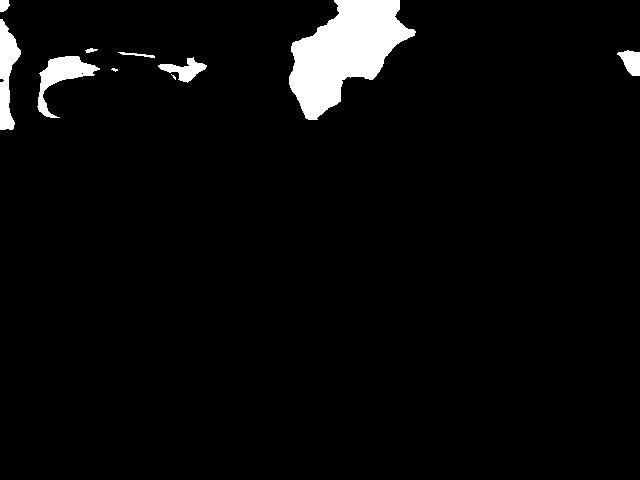

In [ ]:
from optimum.deepsparse import DeepSparseModelForSemanticSegmentation
from transformers import pipeline
from transformers.onnx.utils import get_preprocessor

model_id = "nvidia/segformer-b0-finetuned-ade-512-512"
input_shapes = "[1,3,512,512]"
onnx_model = DeepSparseModelForSemanticSegmentation.from_pretrained(model_id, export=True, input_shapes=input_shapes)
preprocessor = get_preprocessor(model_id)
pipe = pipeline("image-segmentation", model=onnx_model, feature_extractor=preprocessor)
url = "http://images.cocodataset.org/val2017/000000039769.jpg"
outputs = pipe(url)
print(outputs[0]["label"])
outputs[0]['mask']

## Custom Tasks

 You can also use DeepSparse with Hugging Face models for custom tasks, for example to return the output as a [`pooler_output`](https://huggingface.co/docs/transformers/main/main_classes/output#transformers.modeling_outputs.BaseModelOutputWithPoolingAndCrossAttentions.pooler_output) using sentence transformers.


In [2]:
from transformers.onnx.utils import get_preprocessor
from optimum.deepsparse import DeepSparseModelForCustomTasks
model_id = "optimum/sbert-all-MiniLM-L6-with-pooler"
tokenizer = get_preprocessor(model_id)
onnx_model = DeepSparseModelForCustomTasks.from_pretrained(model_id)
tokens = tokenizer("I love burritos!",return_tensors='pt')
outputs = onnx_model(**tokens)
outputs.pooler_output

Model is dynamic and has no shapes defined, skipping reshape..


tensor([[-0.0724, -0.0072,  0.0043,  0.0457, -0.0505, -0.0006, -0.0273,  0.0662,
          0.0766, -0.0234, -0.0278, -0.0123, -0.0485,  0.0452,  0.0233,  0.0570,
          0.1166,  0.0210, -0.0624,  0.0861,  0.0202, -0.0457,  0.0212, -0.1337,
         -0.0249,  0.0571, -0.0057,  0.0381,  0.0652,  0.1134,  0.0475, -0.0210,
         -0.0470, -0.0565,  0.0168, -0.0585,  0.1229,  0.0607, -0.0603,  0.0706,
          0.1250,  0.0844, -0.1580,  0.0471,  0.0322, -0.0320, -0.1447,  0.0115,
          0.0279, -0.0026, -0.1370,  0.0126,  0.0469, -0.0524, -0.0118,  0.1350,
          0.1270,  0.0451,  0.0376,  0.0853,  0.0105, -0.0173, -0.0058, -0.0234,
          0.0635, -0.0785, -0.1062, -0.0118,  0.0166, -0.0171, -0.0322,  0.0309,
         -0.1008,  0.0471, -0.0223, -0.0243, -0.0712,  0.0941, -0.0591, -0.0131,
         -0.0140,  0.0603, -0.0206, -0.0747, -0.1389, -0.1310, -0.1018,  0.1244,
         -0.0596, -0.0645,  0.0412, -0.0525, -0.1046,  0.0467,  0.1467, -0.0025,
          0.0504, -0.0872, -

## Multiple Choice

Multiple Choice is similar to question answering but with multiple candidate answers provided. The model is tasked with predicting the correct answer.



In [ ]:
from transformers.onnx.utils import get_preprocessor
from optimum.deepsparse import DeepSparseModelForMultipleChoice

model_id = "bert-base-cased"
tokenizer = get_preprocessor(model_id)

onnx_model = DeepSparseModelForMultipleChoice.from_pretrained(model_id, export=True,)

num_choices = 4
first_sentence = ["The sky is blue due to the shorter wavelength of blue light."] * num_choices
start = "The color of the sky is"
second_sentence = [start + "blue", start + "green", start + "red", start + "yellow"]
inputs = tokenizer(first_sentence, second_sentence, truncation=True, padding=True)
# Unflatten the tokenized inputs values expanding it to the shape [batch_size, num_choices, seq_length]
for k, v in inputs.items():
    inputs[k] = [v[i : i + num_choices] for i in range(0, len(v), num_choices)]

inps = dict(inputs.convert_to_tensors(tensor_type='pt'))
onnx_outputs = onnx_model(**inps)
onnx_outputs

Framework not specified. Using pt to export to ONNX.
Some weights of BertForMultipleChoice were not initialized from the model checkpoint at bert-base-cased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Using framework PyTorch: 2.0.1+cu118
Overriding 1 configuration item(s)
	- use_cache -> False


============= Diagnostic Run torch.onnx.export version 2.0.1+cu118 =============
verbose: False, log level: Level.ERROR
======================= 0 NONE 0 NOTE 0 WARNING 0 ERROR ========================



Model is dynamic and has no shapes defined, skipping reshape..


MultipleChoiceModelOutput(loss=None, logits=tensor([[1.0635, 1.0853, 1.0902, 1.0693]]), hidden_states=None, attentions=None)

## Masked Language Modeling

Masked Language Modeling is the task of predicting a hidden token in a seqeunce. Masked language models are biredirectional meaning, that they have access to the tokens to the left and right, giving them contenxtual understanding of the entire sequence. A great example of such models is BERT.

In [4]:
from transformers import pipeline
from optimum.deepsparse import DeepSparseModelForMaskedLM
from transformers.onnx.utils import get_preprocessor

model_id = "bert-base-cased"
tokenizer = get_preprocessor(model_id,)
model = DeepSparseModelForMaskedLM.from_pretrained(model_id,export=True,)
fill_masker = pipeline("fill-mask", model=model, tokenizer=tokenizer)

text = "The capital of France is [MASK]."
pred = fill_masker(text)
pred

Framework not specified. Using pt to export to ONNX.


Some weights of the model checkpoint at bert-base-cased were not used when initializing BertForMaskedLM: ['bert.pooler.dense.bias', 'cls.seq_relationship.weight', 'bert.pooler.dense.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Using framework PyTorch: 2.0.1+cu118
Overriding 1 configuration item(s)
	- use_cache -> False


============= Diagnostic Run torch.onnx.export version 2.0.1+cu118 =============
verbose: False, log level: Level.ERROR
======================= 0 NONE 0 NOTE 0 WARNING 0 ERROR ========================



Model is dynamic and has no shapes defined, skipping reshape..


[{'score': 0.4446825385093689,
  'token': 2123,
  'token_str': 'Paris',
  'sequence': 'The capital of France is Paris.'},
 {'score': 0.09396012872457504,
  'token': 10067,
  'token_str': 'Lyon',
  'sequence': 'The capital of France is Lyon.'},
 {'score': 0.08234528452157974,
  'token': 18367,
  'token_str': 'Toulouse',
  'sequence': 'The capital of France is Toulouse.'},
 {'score': 0.07515133172273636,
  'token': 25411,
  'token_str': 'Lille',
  'sequence': 'The capital of France is Lille.'},
 {'score': 0.05692283436655998,
  'token': 17851,
  'token_str': 'Marseille',
  'sequence': 'The capital of France is Marseille.'}]

## Audio Classification

Audio classification is similar to text classification with the difference being that audio classification classifies audio waveforms. For example, you can classifiy animal sounds, commands, speakers, emotions, keywords and spoken language.

The example below shows how to classify intent using the [MInDS-14 dataset](https://huggingface.co/datasets/PolyAI/minds14).

In [ ]:
from optimum.deepsparse import DeepSparseModelForAudioClassification
from transformers import AutoFeatureExtractor, pipeline
from datasets import load_dataset, Audio

model_id = "hf-internal-testing/tiny-random-HubertModel"
processor = AutoFeatureExtractor.from_pretrained(model_id)
model = DeepSparseModelForAudioClassification.from_pretrained(model_id, export=True,)
audio_classifier = pipeline("audio-classification", model=model, feature_extractor=processor)

dataset = load_dataset("PolyAI/minds14", name="en-US", split="train")
dataset = dataset.cast_column("audio", Audio(sampling_rate=16000))
sampling_rate = dataset.features["audio"].sampling_rate
audio_file = dataset[0]["audio"]["path"]
pred = audio_classifier(audio_file)
pred


Framework not specified. Using pt to export to ONNX.


Some weights of HubertForSequenceClassification were not initialized from the model checkpoint at hf-internal-testing/tiny-random-HubertModel and are newly initialized: ['projector.weight', 'projector.bias', 'classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Using framework PyTorch: 2.0.1+cu118
/usr/local/lib/python3.10/dist-packages/transformers/models/hubert/modeling_hubert.py:493: TracerWarning: Converting a tensor to a Python boolean might cause the trace to be incorrect. We can't record the data flow of Python values, so this value will be treated as a constant in the future. This means that the trace might not generalize to other inputs!
  if attn_weights.size() != (bsz * self.num_heads, tgt_len, src_len):
/usr/local/lib/python3.10/dist-packages/transformers/models/hubert/modeling_hubert.py:532: TracerWarning: Converting a tensor to a Python boolean might cause the trace to be incorrect. We can't record the data flow of Python values, so this value will be treated as a constant in the future. This means that the trace might not generalize to other inputs!
  if attn_output.size() != (bsz * self.num_heads, tgt_len, self.head_dim):


============= Diagnostic Run torch.onnx.export version 2.0.1+cu118 =============
verbose: False, log level: Level.ERROR
======================= 0 NONE 0 NOTE 0 WARNING 0 ERROR ========================



Generating train split: 0 examples [00:00, ? examples/s]

Dataset minds14 downloaded and prepared to /root/.cache/huggingface/datasets/PolyAI___minds14/en-US/1.0.0/65c7e0f3be79e18a6ffaf879a083daf706312d421ac90d25718459cbf3c42696. Subsequent calls will reuse this data.


Model is dynamic and has no shapes defined, skipping reshape..


[{'score': 0.502556562423706, 'label': 'LABEL_0'},
 {'score': 0.49744346737861633, 'label': 'LABEL_1'}]

## Question Answering

Given a context and question, a Question Answering model provides an answer to the given question.

Question-answering models are helpful in retrieving answers quickly from large texts.

Searching documents quickly is one example of a question-answering model in use. Imagine a situation where you have thousands of documents but need to find an answer from the documents. At the same time, you'd like to get the document where the answer comes from. You could open and search the documents one by one, but that would take a long time.

Enter Extractive Question Answering with Sparse Transformers.
With Extractive Question Answering, you input a query into the system and in return, you get the answer to your question and the document containing the answer.

Extractive Question Answering enables you to search many records and find the answer.

It works by:

- Retrieving documents that are relevant to answering the questions.
- Returns text that answers that question.

[Want to train a sparse model on your data? Checkout the documentation on sparse transfer learning](https://docs.neuralmagic.com/use-cases/natural-language-processing/question-answering)

In [ ]:
from transformers import AutoTokenizer, pipeline
from optimum.deepsparse import DeepSparseModelForQuestionAnswering

model_id = "uw-madison/nystromformer-512"
seq_length = 384
input_shapes = f"[1,{seq_length}]"
model = DeepSparseModelForQuestionAnswering.from_pretrained(
    model_id,
    export=True,
    input_shapes=input_shapes,
)
padding_kwargs = {
    "padding": "max_length",
    "max_length": seq_length,
    "truncation": True,
}
tokenizer = AutoTokenizer.from_pretrained(model_id)

pipe = pipeline(
    "question-answering",
    model=model,
    tokenizer=tokenizer,
)
question = "What is DeepSparse?"
context = "DeepSparse is sparsity-aware inference runtime offering GPU-class performance on CPUs and APIs to integrate ML into your application."
outputs = pipe(question=question, context=context,**padding_kwargs)
print(outputs)

Framework not specified. Using pt to export to ONNX.
Some weights of NystromformerForQuestionAnswering were not initialized from the model checkpoint at uw-madison/nystromformer-512 and are newly initialized: ['qa_outputs.bias', 'qa_outputs.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Using framework PyTorch: 2.0.1+cu118
Overriding 1 configuration item(s)
	- use_cache -> False


============= Diagnostic Run torch.onnx.export version 2.0.1+cu118 =============
verbose: False, log level: Level.ERROR
======================= 0 NONE 0 NOTE 0 WARNING 0 ERROR ========================



Saving new model with static input shapes at /tmp/tmp654393ih/model.onnx
Compiling...
deepsparse.engine.Engine:
	onnx_file_path: /tmp/tmp654393ih/model.onnx
	batch_size: 1
	num_cores: 1
	num_streams: 1
	scheduler: Scheduler.default
	fraction_of_supported_ops: 0.9957
	cpu_avx_type: avx2
	cpu_vnni: False


{'score': 0.0013331316877156496, 'start': 13, 'end': 94, 'answer': ' sparsity-aware inference runtime offering GPU-class performance on CPUs and APIs'}


## Sequence Classification

Text Classification is an example of sequence classification involving assigning a label to a given text. For example, sentiment analysis is an example of a text classification use case.


Customer review classification is a great example of text classification in action.

The ability to quickly classify sentiment from customers is an added advantage for any business. Therefore, whichever solution you deploy for classifying the customer reviews should deliver results in the shortest time possible. By being fast the solution will process more volume, hence cheaper computational resources are utilized.

When deploying a text classification model, decreasing the model’s latency and increasing its throughput is critical. This is why you should choose DeepSparse when deploying such models.

[Want to train a sparse model on your data? Checkout the documentation on sparse transfer learning](https://docs.neuralmagic.com/use-cases/natural-language-processing/question-answering)

In [ ]:
from transformers import AutoTokenizer, pipeline
from optimum.deepsparse import DeepSparseModelForSequenceClassification

model_id = "distilbert-base-uncased-finetuned-sst-2-english"
seq_length = 128
input_shape = f"[1,{seq_length}]"
model = DeepSparseModelForSequenceClassification.from_pretrained(
    model_id,
    export=True,
    input_shape=input_shape,
)
tokenizer = AutoTokenizer.from_pretrained(model_id)
pipe = pipeline(
    "text-classification",
    model=model,
    tokenizer=tokenizer,
    padding="max_length",
    max_length=seq_length,
    truncation=True,
)

outputs = pipe("Hi I like you")
print(outputs)

Framework not specified. Using pt to export to ONNX.
Using framework PyTorch: 2.0.1+cu118


============= Diagnostic Run torch.onnx.export version 2.0.1+cu118 =============
verbose: False, log level: Level.ERROR
======================= 0 NONE 0 NOTE 0 WARNING 0 ERROR ========================



Model is dynamic and has no shapes defined, skipping reshape..


[{'label': 'POSITIVE', 'score': 0.9997448325157166}]


## Image Classification

Image classification is the task of identifying the type of object in an image and the corresponding confidence.

Image classification is applicable in scenarios where you are interested in only classifying an object in an image without localizing it. For example, you can build an image classification model to classify products in a store.

[Want to train a sparse model on your data? Checkout the documentation on sparse transfer learning](https://docs.neuralmagic.com/use-cases/image-classification/sparsifying)


In [ ]:
from transformers import AutoFeatureExtractor, pipeline
from optimum.deepsparse import DeepSparseModelForImageClassification

model_id = "microsoft/resnet-50"
image_model = DeepSparseModelForImageClassification.from_pretrained(model_id, export=True, input_shape_dict={"pixel_values": [1, 3, 224, 224]}, output_shape_dict={"logits": [1, 1000]},)
feature_extractor = AutoFeatureExtractor.from_pretrained(model_id)
cls_pipe = pipeline("image-classification", model=image_model, feature_extractor=feature_extractor)

outputs = cls_pipe("http://images.cocodataset.org/val2017/000000039769.jpg")
outputs


Framework not specified. Using pt to export to ONNX.


Could not find image processor class in the image processor config or the model config. Loading based on pattern matching with the model's feature extractor configuration.
/usr/local/lib/python3.10/dist-packages/transformers/models/convnext/feature_extraction_convnext.py:28: FutureWarning: The class ConvNextFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use ConvNextImageProcessor instead.
  warnings.warn(
Using framework PyTorch: 2.0.1+cu118
/usr/local/lib/python3.10/dist-packages/transformers/models/resnet/modeling_resnet.py:95: TracerWarning: Converting a tensor to a Python boolean might cause the trace to be incorrect. We can't record the data flow of Python values, so this value will be treated as a constant in the future. This means that the trace might not generalize to other inputs!
  if num_channels != self.num_channels:


============= Diagnostic Run torch.onnx.export version 2.0.1+cu118 =============
verbose: False, log level: Level.ERROR
======================= 0 NONE 0 NOTE 0 WARNING 0 ERROR ========================



Could not find image processor class in the image processor config or the model config. Loading based on pattern matching with the model's feature extractor configuration.
Compiling...
deepsparse.engine.Engine:
	onnx_file_path: /tmp/tmpl28nzfjf/model.onnx
	batch_size: 1
	num_cores: 1
	num_streams: 1
	scheduler: Scheduler.default
	fraction_of_supported_ops: 1.0
	cpu_avx_type: avx2
	cpu_vnni: False


[{'score': 0.9416143894195557, 'label': 'tiger cat'},
 {'score': 0.03436681255698204, 'label': 'tabby, tabby cat'},
 {'score': 0.0016435637371614575, 'label': 'remote control, remote'},
 {'score': 0.0014440866652876139, 'label': 'Egyptian cat'},
 {'score': 0.000764776486903429, 'label': 'jinrikisha, ricksha, rickshaw'}]

## Where to go from here

Join us on [Slack](https://join.slack.com/t/discuss-neuralmagic/shared_invite/zt-q1a1cnvo-YBoICSIw3L1dmQpjBeDurQ) for any questions or create an issue on [GitHub](https://github.com/neuralmagic)